

### 1. **Data Preprocessing (OHLC Data)**
   - **OHLC Data**: You'll use the Nifty 50 dataset containing Open, High, Low, and Close prices.
   - **Normalization**: Normalize the data before applying the machine learning models to ensure that the LSTM and RNN can learn effectively. You can use MinMax scaling or standardization.

### 2. **Applying Technical Indicators**
   You’ll calculate different indicators such as:
   - **Relative Strength Index (RSI)**: This helps in identifying overbought or oversold conditions.
   - **Moving Averages (MA)**: You can calculate simple or exponential moving averages to smooth the price data.
   - **Moving Average Convergence Divergence (MACD)**: A trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

   You can compute these using libraries like `ta-lib` in Python or write custom functions.

### 3. **LSTM Model**
   - **Data Preparation**: Use the OHLC data along with the computed indicators as input features. The input data should be reshaped for LSTM into a 3D format `(samples, time_steps, features)`.
   - **LSTM Model Architecture**:
     - Start with an LSTM layer that takes time series data and captures temporal dependencies.
     - Add dropout layers to prevent overfitting.
     - Output the results for the next layer.

### 4. **Use of RNN**
   - After getting the output from the LSTM, feed the result into an RNN.
   - The RNN will help to further learn the sequential dependencies and patterns from the LSTM output.

### 5. **Model Evaluation**
   - Use a suitable evaluation metric like Root Mean Square Error (RMSE) or Mean Absolute Error (MAE) to check the performance of your models.

### 6. **Visualization**
   - After training, plot the predicted vs. actual values to understand the model’s performance.



In [1]:
pip install yfinance


In [4]:
import yfinance as yahooFinance

# in order to specify start date and
# end date we need datetime package
import datetime

# startDate , as per our convenience we can modify
startDate = datetime.datetime(2009, 1, 1)

# endDate , as per our convenience we can modify
endDate = datetime.datetime(2010, 12, 31)
GetFacebookInformation = yahooFinance.Ticker("^NSEI")

# pass the parameters as the taken dates for start and end
print(GetFacebookInformation.history(start=startDate,end=endDate))

                                   Open          High           Low  \
Date                                                                  
2010-01-04 00:00:00+05:30   5200.899902   5238.450195   5167.100098   
2010-01-05 00:00:00+05:30   5277.149902   5288.350098   5242.399902   
2010-01-06 00:00:00+05:30   5278.149902   5310.850098   5260.049805   
2010-01-07 00:00:00+05:30   5281.799805   5302.549805   5244.750000   
2010-01-08 00:00:00+05:30   5264.250000   5276.750000   5234.700195   
...                                 ...           ...           ...   
2019-12-24 00:00:00+05:30  12269.250000  12283.700195  12202.099609   
2019-12-26 00:00:00+05:30  12211.849609  12221.549805  12118.849609   
2019-12-27 00:00:00+05:30  12172.900391  12258.450195  12157.900391   
2019-12-30 00:00:00+05:30  12274.900391  12286.450195  12213.799805   
2019-12-31 00:00:00+05:30  12247.099609  12247.099609  12151.799805   

                                  Close  Volume  Dividends  Stock Splits  
D

### **RSI FROM HERE**



In [7]:
import pandas as pd
import numpy as np

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()  # Calculate the difference between consecutive close prices
    gain = np.where(delta > 0, delta, 0)  # Take only the positive differences (gains)
    loss = np.where(delta < 0, -delta, 0)  # Take only the negative differences (losses)

    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()  # Rolling average of gains
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()  # Rolling average of losses

    rs = avg_gain / avg_loss  # Relative Strength (RS)
    rsi = 100 - (100 / (1 + rs))  # RSI formula

    data['RSI'] = rsi  # Add RSI to the dataframe
    return data

# Apply RSI to the Nifty 50 OHLC data
nifty_data = pd.read_csv('nifty50_ohlc_data.csv')  # Load data (assumed already saved)
nifty_data = calculate_rsi(nifty_data)

# Display the data with RSI
print(nifty_data[['Date', 'Close', 'RSI']].tail())


            Date         Close        RSI
2438  2019-12-24  12214.549805  61.330392
2439  2019-12-26  12126.549805  56.599703
2440  2019-12-27  12245.799805  69.264568
2441  2019-12-30  12255.849609  69.045744
2442  2019-12-31  12168.450195  68.496687


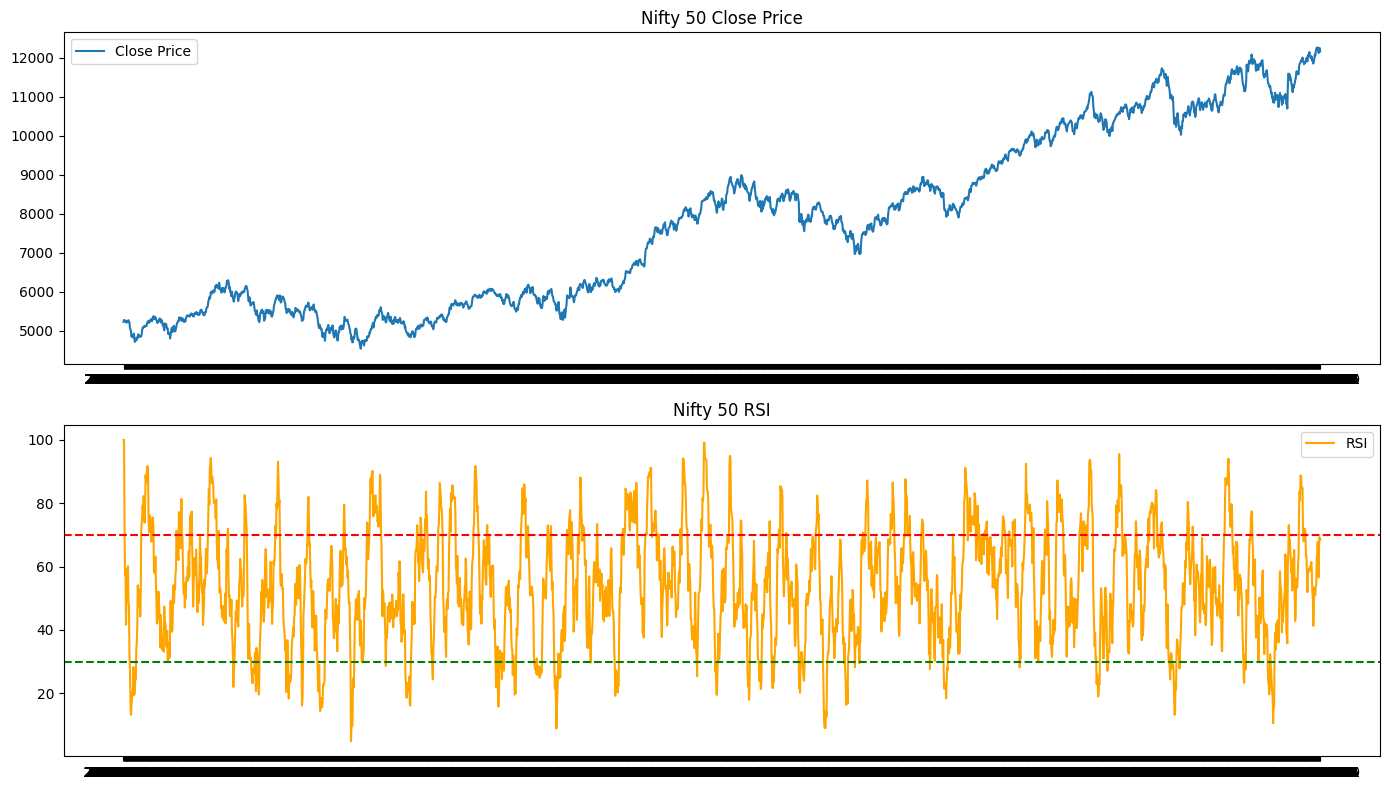

In [8]:
import matplotlib.pyplot as plt

# Plot the Close price and RSI
plt.figure(figsize=(14, 8))

# Plot the closing price
plt.subplot(2, 1, 1)
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Close Price')
plt.title('Nifty 50 Close Price')
plt.legend()

# Plot the RSI
plt.subplot(2, 1, 2)
plt.plot(nifty_data['Date'], nifty_data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')  # Overbought level
plt.axhline(30, color='green', linestyle='--')  # Oversold level
plt.title('Nifty 50 RSI')
plt.legend()

plt.tight_layout()
plt.show()


TWKING THE OVER BOUGHT/SELL RATIO

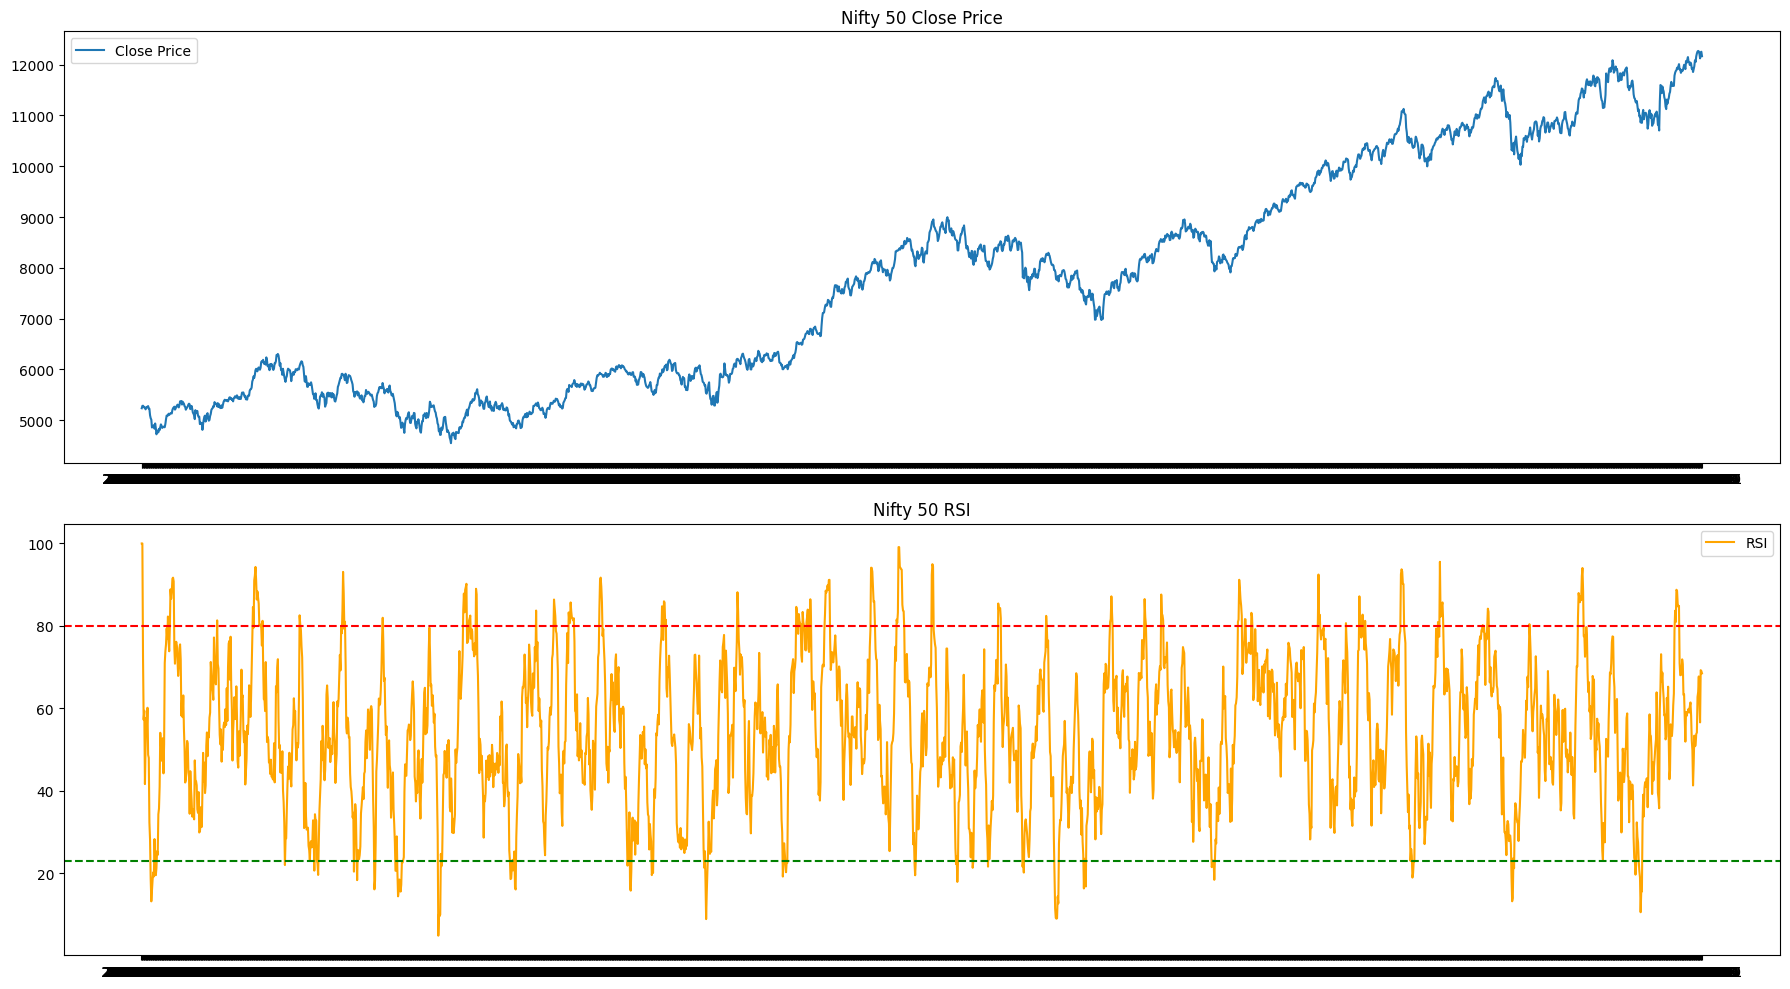

In [9]:



import matplotlib.pyplot as plt

# Plot the Close price and RSI
plt.figure(figsize=(21, 10))  # Width = 18, Height = 10

# Plot the closing price
plt.subplot(2, 1, 1)
plt.plot(nifty_data['Date'], nifty_data['Close'], label='Close Price')
plt.title('Nifty 50 Close Price')
plt.legend()

# Plot the RSI
plt.subplot(2, 1, 2)
plt.plot(nifty_data['Date'], nifty_data['RSI'], label='RSI', color='orange')
plt.axhline(80, color='red', linestyle='--')  # Overbought level
plt.axhline(23, color='green', linestyle='--')  # Oversold level
plt.title('Nifty 50 RSI')
plt.legend()

plt.tight_layout()
plt.show()


### **LSTM FROM HERE**


In [12]:
# prompt: pip install numpy pandas scikit-learn tensorflow matplotlib

!pip install numpy pandas scikit-learn tensorflow matplotlib


In [14]:
import pandas as pd
import numpy as np

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()  # Calculate the difference between consecutive close prices
    gain = np.where(delta > 0, delta, 0)  # Take only the positive differences (gains)
    loss = np.where(delta < 0, -delta, 0)  # Take only the negative differences (losses)

    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()  # Rolling average of gains
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()  # Rolling average of losses

    rs = avg_gain / avg_loss  # Relative Strength (RS)
    rsi = 100 - (100 / (1 + rs))  # RSI formula

    data['RSI'] = rsi  # Add RSI to the dataframe
    return data

# Load the Nifty 50 data
nifty_data = pd.read_csv('nifty50_ohlc_data.csv')

# Calculate RSI and check the DataFrame
nifty_data = calculate_rsi(nifty_data)
print(nifty_data[['Date', 'Close', 'RSI']].head())  # Display the first few rows to verify

# Ensure to save this DataFrame if needed
nifty_data.to_csv('nifty50_with_rsi.csv', index=False)


         Date        Close         RSI
0  2010-01-04  5232.200195         NaN
1  2010-01-05  5277.899902  100.000000
2  2010-01-06  5281.799805  100.000000
3  2010-01-07  5263.100098   72.620946
4  2010-01-08  5244.750000   57.241714


In [15]:
# Use only the 'Close' and 'RSI' columns for prediction
data = nifty_data[['Close', 'RSI']].dropna()

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create a dataset with time steps
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), :])
        y.append(dataset[i + time_step, 0])  # Predict the 'Close' price
    return np.array(X), np.array(y)

# Create datasets with a specified time step
time_step = 30  # 30 days
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)  # 2 features: Close and RSI
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)


In [16]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))  # Dense layer for output
model.add(Dense(1))   # Output layer to predict Close price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,101 (125.39 KB)

 Trainable params: 32,101 (125.39 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fit the model to the training data
model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0231
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0023
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0015
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0013
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0011
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0011
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 9.0072e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 9.1006e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 9.7527e-04
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 7.9063e-04
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 7.0272e-04
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.0348e-04
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 7.8080e-04
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 3

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


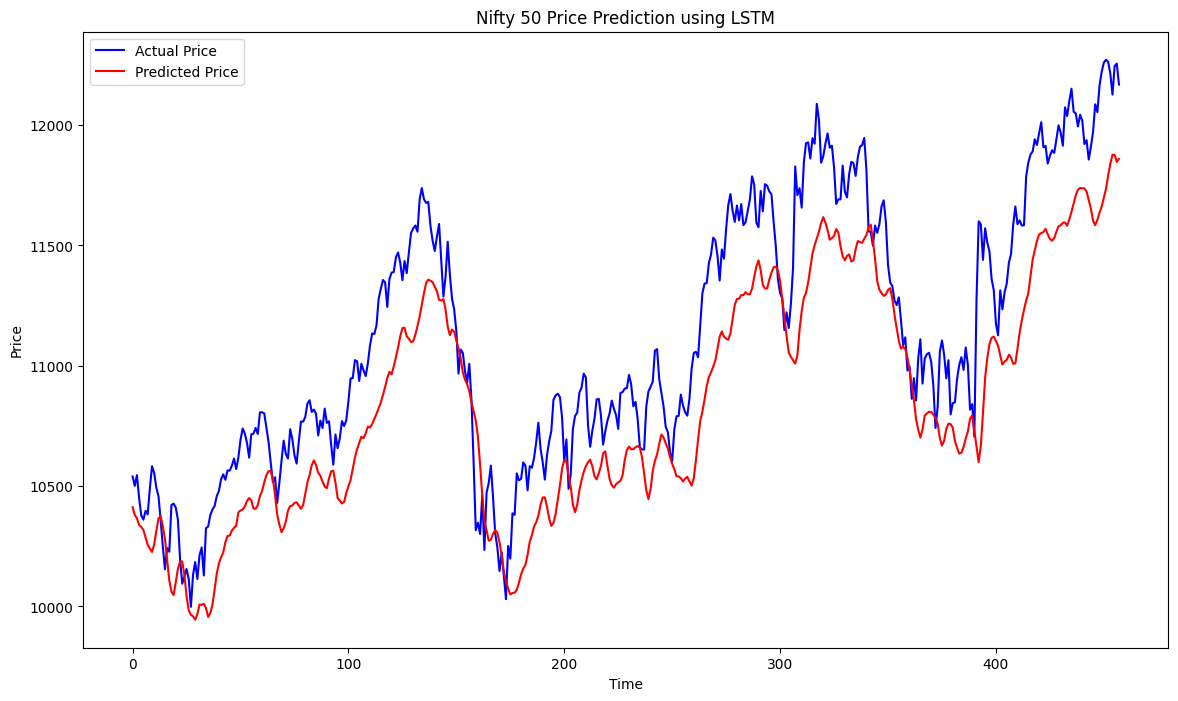

In [18]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], 1)))))

# Get the actual prices
actual_prices = scaler.inverse_transform(test_data[time_step + 1:])

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(actual_prices[:, 0], label='Actual Price', color='blue')
plt.plot(predictions[:, 0], label='Predicted Price', color='red')
plt.title('Nifty 50 Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


### **RNN FROM HERE **

In [19]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

# Create the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
rnn_model.add(Dropout(0.2))  # Dropout to prevent overfitting
rnn_model.add(SimpleRNN(50, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(25))  # Dense layer for output
rnn_model.add(Dense(1))   # Output layer to predict Close price

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
rnn_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 30, 50)              │           2,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,001 (35.16 KB)

 Trainable params: 9,001 (35.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Fit the RNN model to the training data
rnn_model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1299
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0172
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0072
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0047
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0032
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0019
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0015
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0013
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0011
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.5977e-04
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


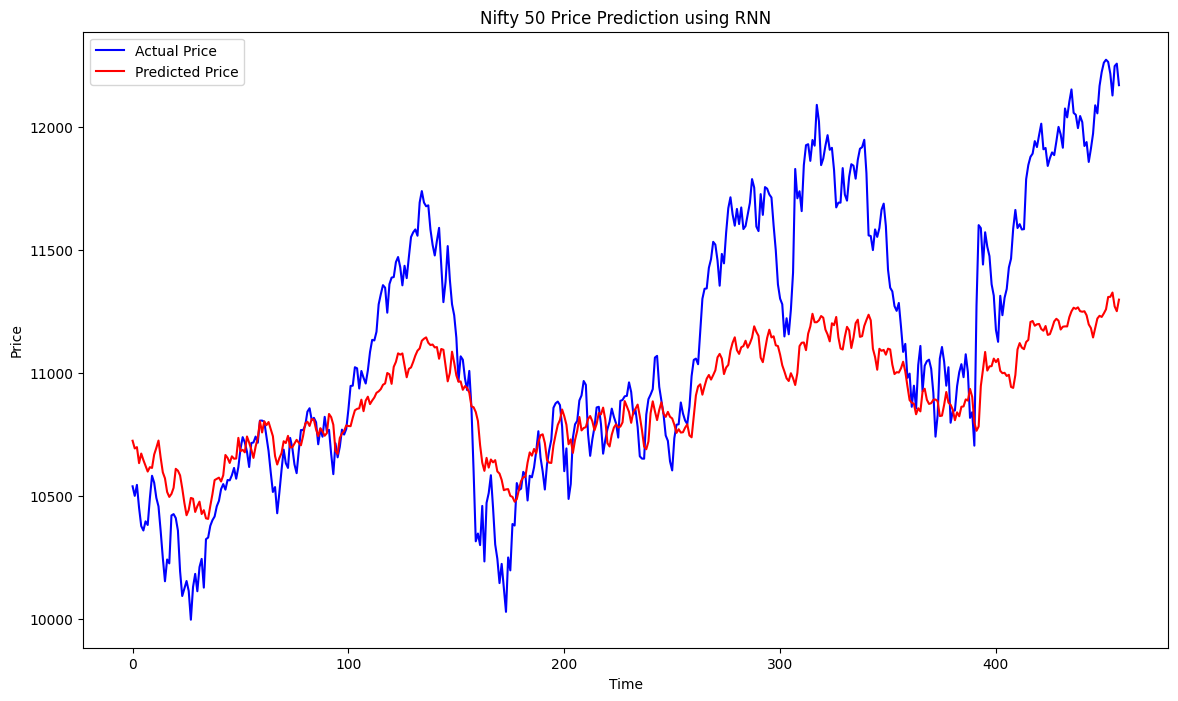

In [21]:
# Make predictions
rnn_predictions = rnn_model.predict(X_test)

# Inverse transform to get actual prices
rnn_predictions = scaler.inverse_transform(np.hstack((rnn_predictions, np.zeros((rnn_predictions.shape[0], 1)))))

# Get the actual prices
actual_prices = scaler.inverse_transform(test_data[time_step + 1:])

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(actual_prices[:, 0], label='Actual Price', color='blue')
plt.plot(rnn_predictions[:, 0], label='Predicted Price', color='red')
plt.title('Nifty 50 Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



# **The GRU Model**

In [22]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

# Create the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 2)))  # 50 units
gru_model.add(Dropout(0.2))  # Dropout to prevent overfitting
gru_model.add(GRU(50, return_sequences=False))  # Second GRU layer
gru_model.add(Dropout(0.2))
gru_model.add(Dense(25))  # Dense layer for output
gru_model.add(Dense(1))   # Output layer to predict Close price

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
gru_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 50)              │           8,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,701 (96.49 KB)

 Trainable params: 24,701 (96.49 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Fit the GRU model to the training data
gru_model.fit(X_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0395
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0026
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0021
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0016
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0013
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0011
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0013
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.9547e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 9.6523e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 7.2413e-04
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.5673e-04
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 7.5584e-04
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 6.9862e-04
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 6.9425e-04
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


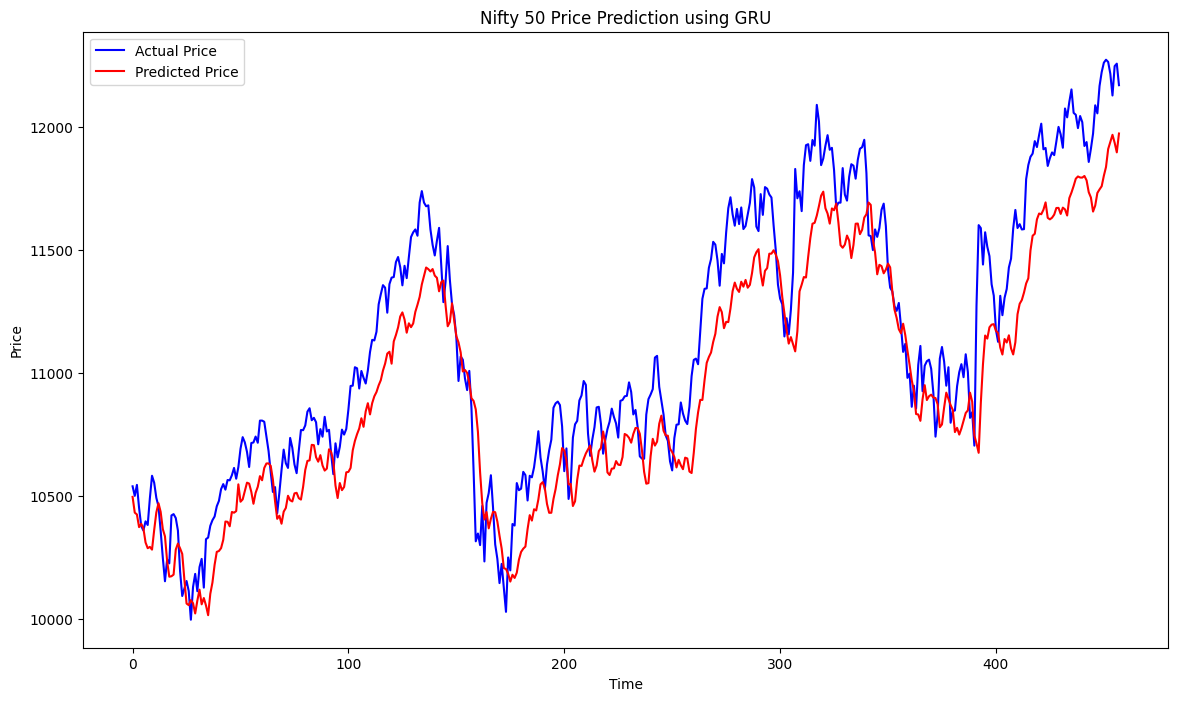

In [24]:
# Make predictions
gru_predictions = gru_model.predict(X_test)

# Inverse transform to get actual prices
gru_predictions = scaler.inverse_transform(np.hstack((gru_predictions, np.zeros((gru_predictions.shape[0], 1)))))

# Get the actual prices
actual_prices = scaler.inverse_transform(test_data[time_step + 1:])

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(actual_prices[:, 0], label='Actual Price', color='blue')
plt.plot(gru_predictions[:, 0], label='Predicted Price', color='red')
plt.title('Nifty 50 Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# **testing somethings not much.**

In [64]:
# Generate predictions from the RNN model (use the appropriate X_test)
rnn_predictions = rnn_model.predict(X_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [71]:
print(f"Length of actual_prices_inverse: {len(actual_prices_inverse)}")
print(f"Length of rnn_predictions_inverse: {len(rnn_predictions_inverse)}")


Length of actual_prices_inverse: 2442
Length of rnn_predictions_inverse: 458


In [72]:
# Ensure that you are only using the valid part of the predictions
# Adjust this according to your specific data and how you generated predictions
rnn_predictions = rnn_model.predict(X_test)  # Ensure you use the correct input for predictions

# Assuming you already inverse transformed predictions correctly
rnn_predictions_inverse = scaler.inverse_transform(
    np.hstack((rnn_predictions.reshape(-1, 1), np.zeros((rnn_predictions.shape[0], 1))))
)[:, 0]

# Assuming actual_prices is correctly derived
# For instance, if you have a separate test dataset
actual_prices_inverse = scaler.inverse_transform(
    np.hstack((actual_prices.reshape(-1, 1), np.zeros((actual_prices.shape[0], 1))))
)[:, 0]

# Now both should have the same length
print(f"Length of actual_prices_inverse: {len(actual_prices_inverse)}")
print(f"Length of rnn_predictions_inverse: {len(rnn_predictions_inverse)}")

# Proceed to calculate evaluation metrics if lengths match
if len(actual_prices_inverse) == len(rnn_predictions_inverse):
    rmse = np.sqrt(mean_squared_error(actual_prices_inverse, rnn_predictions_inverse))
    mae = mean_absolute_error(actual_prices_inverse, rnn_predictions_inverse)

    # Print the results
    print(f'Root Mean Square Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
else:
    print("Lengths do not match. Please check your data preparation steps.")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Length of actual_prices_inverse: 2442
Length of rnn_predictions_inverse: 458
Lengths do not match. Please check your data preparation steps.


In [73]:
print(f"Length of actual_prices_inverse: {len(actual_prices_inverse)}")
print(f"Length of rnn_predictions_inverse: {len(rnn_predictions_inverse)}")


Length of actual_prices_inverse: 2442
Length of rnn_predictions_inverse: 458


In [74]:
# Inverse transform the predictions (ensure correct shape)
rnn_predictions_inverse = scaler.inverse_transform(
    np.hstack((rnn_predictions.reshape(-1, 1), np.zeros((rnn_predictions.shape[0], 1))))
)[:, 0]

# Assuming actual_prices is correctly derived from the same test set
actual_prices_inverse = scaler.inverse_transform(
    np.hstack((actual_prices.reshape(-1, 1), np.zeros((actual_prices.shape[0], 1))))
)[:, 0]


In [75]:
print(f"Length of actual_prices_inverse after transformation: {len(actual_prices_inverse)}")
print(f"Length of rnn_predictions_inverse after transformation: {len(rnn_predictions_inverse)}")


Length of actual_prices_inverse after transformation: 2442
Length of rnn_predictions_inverse after transformation: 458


In [76]:
if len(actual_prices_inverse) == len(rnn_predictions_inverse):
    rmse = np.sqrt(mean_squared_error(actual_prices_inverse, rnn_predictions_inverse))
    mae = mean_absolute_error(actual_prices_inverse, rnn_predictions_inverse)

    # Print the results
    print(f'Root Mean Square Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
else:
    print("Lengths do not match. Please check your data preparation steps.")


Lengths do not match. Please check your data preparation steps.


In [77]:
print(f"Shape of actual_prices: {actual_prices.shape}")
print(f"Shape of rnn_predictions: {rnn_predictions.shape}")


Shape of actual_prices: (2442,)
Shape of rnn_predictions: (458, 1)


In [78]:
# Check the shape of X_test as well
print(f"Shape of X_test: {X_test.shape}")


Shape of X_test: (458, 30, 2)


In [79]:
# If using a train-test split
print(f"Training data size: {len(X_train)}")
print(f"Test data size: {len(X_test)}")


Training data size: 1922
Test data size: 458


In [80]:
print(f"Shape of rnn_predictions before inverse transform: {rnn_predictions.shape}")
print(f"Shape of actual_prices before inverse transform: {actual_prices.shape}")


Shape of rnn_predictions before inverse transform: (458, 1)
Shape of actual_prices before inverse transform: (2442,)


In [81]:
# Reshape if needed, based on what you find in the previous steps
rnn_predictions_reshaped = rnn_predictions.reshape(-1, 1)  # Reshape to (n_samples, n_features)
actual_prices_reshaped = actual_prices.reshape(-1, 1)      # Adjust as necessary

# Perform the inverse transformation
rnn_predictions_inverse = scaler.inverse_transform(
    np.hstack((rnn_predictions_reshaped, np.zeros((rnn_predictions_reshaped.shape[0], 1))))
)[:, 0]

actual_prices_inverse = scaler.inverse_transform(
    np.hstack((actual_prices_reshaped, np.zeros((actual_prices_reshaped.shape[0], 1))))
)[:, 0]


In [82]:
print(f"Final shape of actual_prices_inverse: {actual_prices_inverse.shape}")
print(f"Final shape of rnn_predictions_inverse: {rnn_predictions_inverse.shape}")


Final shape of actual_prices_inverse: (2442,)
Final shape of rnn_predictions_inverse: (458,)


In [84]:
# Assuming both are 1D arrays of prices
if len(actual_prices_inverse) > len(rnn_predictions_inverse):
    actual_prices_inverse = actual_prices_inverse[:len(rnn_predictions_inverse)]
elif len(rnn_predictions_inverse) > len(actual_prices_inverse):
    rnn_predictions_inverse = rnn_predictions_inverse[:len(actual_prices_inverse)]

# Now calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_prices_inverse, rnn_predictions_inverse))
mae = mean_absolute_error(actual_prices_inverse, rnn_predictions_inverse)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 42150836.73979261
MAE: 42054898.01102004


In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_prices_inverse, rnn_predictions_inverse))
mae = mean_absolute_error(actual_prices_inverse, rnn_predictions_inverse)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 42150836.73979261
MAE: 42054898.01102004


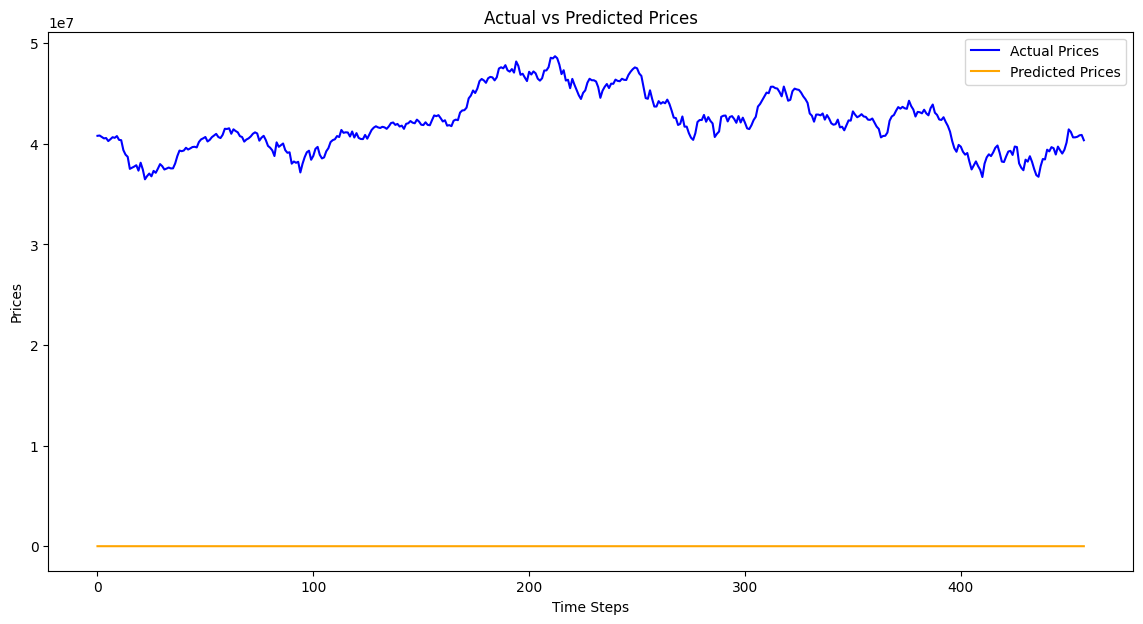

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(actual_prices_inverse, label='Actual Prices', color='blue')
plt.plot(rnn_predictions_inverse, label='Predicted Prices', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Prices')
plt.legend()
plt.show()


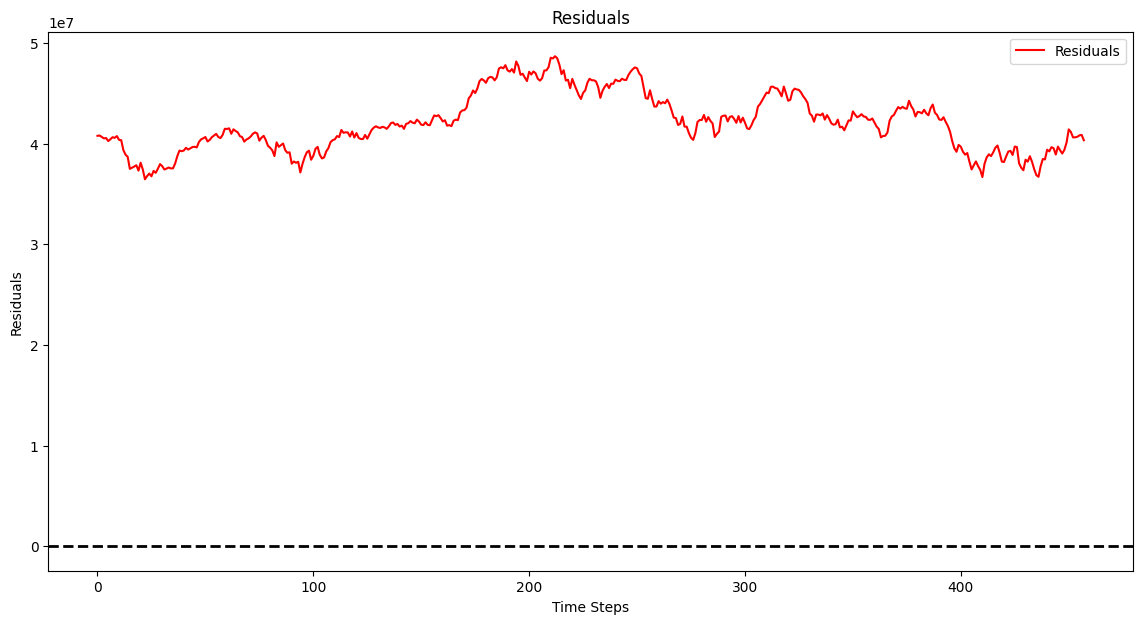

In [88]:
residuals = actual_prices_inverse - rnn_predictions_inverse
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residuals')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.axhline(0, color='black', lw=2, linestyle='--')
plt.legend()
plt.show()


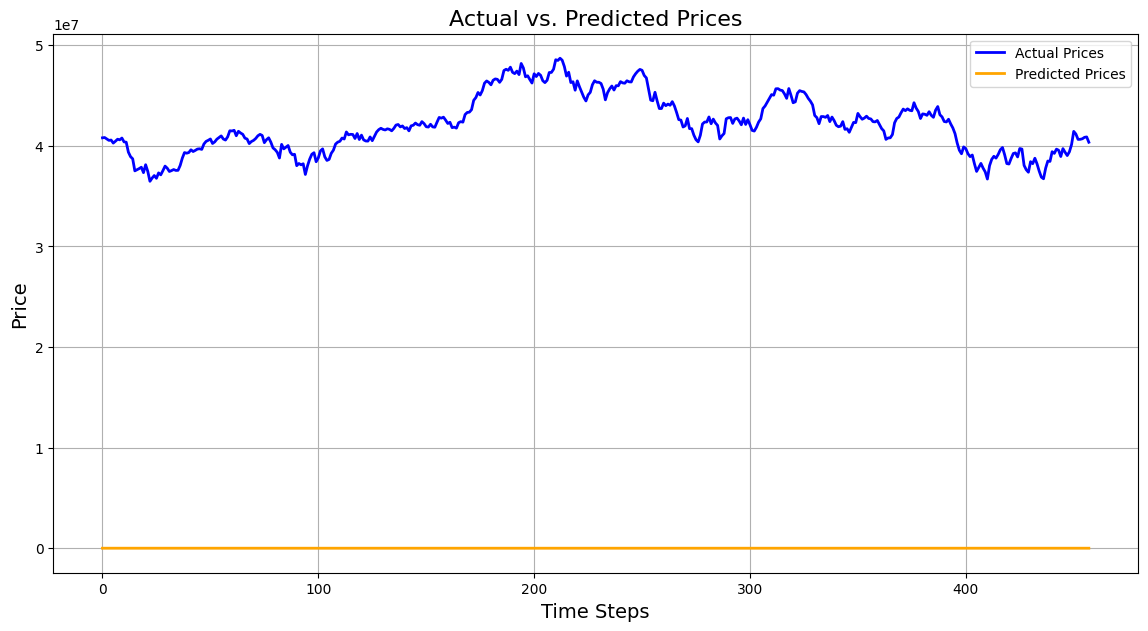

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the actual and predicted prices stored in the following variables
# actual_prices_inverse: Actual prices (after inverse transformation)
# rnn_predictions_inverse: Predicted prices (after inverse transformation)

# Example of data (replace with your actual data)
# actual_prices_inverse = ...
# rnn_predictions_inverse = ...

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(actual_prices_inverse, label='Actual Prices', color='blue', linewidth=2)
plt.plot(rnn_predictions_inverse, label='Predicted Prices', color='orange', linewidth=2)

# Adding titles and labels
plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
